# Projeto Desempenho de Alunos.
### Autor: Luan Oliveira Alvarez

In [95]:
# Importando bibliotecas utilizadas.
import numpy as np 
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline


In [96]:
#importando a tabela e guardando ela em uma variavel.
tabela = pd.read_csv("student_data.csv")

In [97]:
tabela.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10


In [98]:
tabela.columns

Index(['school', 'sex', 'age', 'address', 'famsize', 'Pstatus', 'Medu', 'Fedu',
       'Mjob', 'Fjob', 'reason', 'guardian', 'traveltime', 'studytime',
       'failures', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery',
       'higher', 'internet', 'romantic', 'famrel', 'freetime', 'goout', 'Dalc',
       'Walc', 'health', 'absences', 'G1', 'G2', 'G3'],
      dtype='object')

# Organização.
- Eu poderia criar e alterar o nome das colunas para traduzir, porém prefiro trabalhar com elas originais. 
- Com exceção de colunas com nomes defeituosos.


In [99]:
# Criando uma coluna de nota final para cada entrada
tabela['Final Grade'] = (tabela["G1"] + tabela['G2'] + tabela['G3']) / 3

# Criando uma coluna de Saúde geral para cada entrada
tabela['Overall Health'] = (0.5 * tabela['Dalc'] + 0.5 * tabela['Walc'] + 2 * tabela['health'] + tabela['famrel']) / 4

In [100]:
# Armazenando todos os padrôes usadas
padrao = ['G1', 'G2', 'G3', "Final Grade"]

# Saúde geral x Nota
### A relação entre esses dois recursos pode ser representada usando um gráfico de regressão simples.

<AxesSubplot:xlabel='Overall Health', ylabel='Final Grade'>

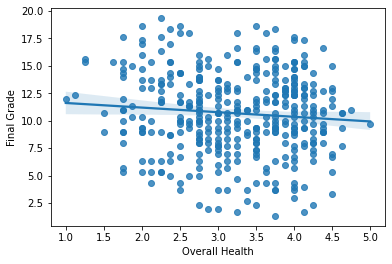

In [101]:
sns.regplot(x='Overall Health', y='Final Grade', data=tabela)

# Observações:
- Um melhor valor geral de saúde corresponde a uma nota final mais baixa. Por outro lado, um valor geral de saúde mais baixo geralmente corresponde a uma nota final mais alta.
- A inclinação da linha de melhor ajuste está a uma pequena distância de zero, então a correlação entre Saúde Geral e Nota Final é baixa.
- Podemos explorar ainda mais esta última observação organizando as parcelas com base na presença ou ausência de certos atributos

<Figure size 1008x504 with 0 Axes>

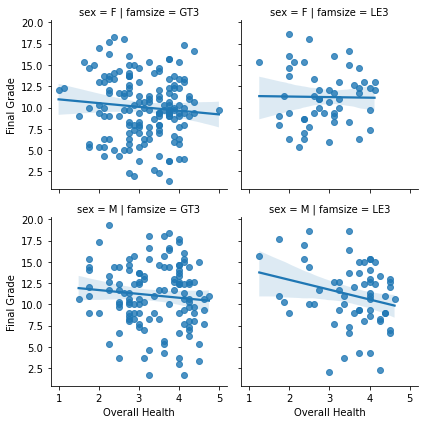

In [102]:
plt.figure(figsize=(14, 7))
op = sns.FacetGrid(tabela, col='famsize', row='sex')
op.map(sns.regplot, 'Overall Health', 'Final Grade')

# Observações:
- O tamanho da família tem grande impacto na inclinação da linha na parcela, o tamanho da família pode ditar a gravidade em que a saúde geral afeta a nota final.

# Ausências x Nota

<AxesSubplot:xlabel='absences', ylabel='Final Grade'>

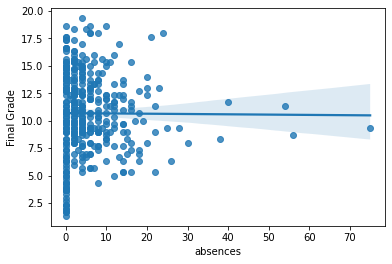

In [103]:
sns.regplot(x='absences', y='Final Grade', data=tabela)

- Interessante, parece não haver nenhuma correlação entre as Ausências e a Nota Final. Antes de identificarmos uma possível razão para isso, vamos examinar a relação entre as Ausências e cada uma das três métricas de notas individuais.

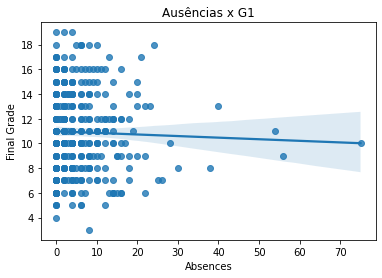

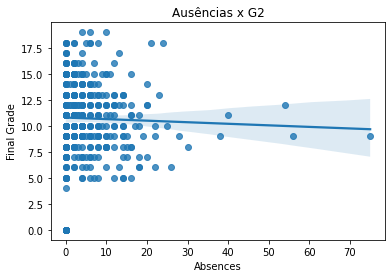

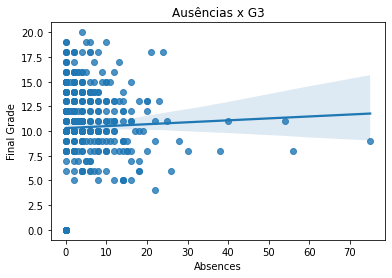

In [104]:
notas_individuais = ['G1', 'G2', 'G3']

for metricas in notas_individuais:
    sns.regplot(x='absences', y=metricas, data=tabela).set(xlabel='Absences', ylabel='Final Grade', title=f'Ausências x {metricas}')
    plt.show()

- A razão para essa baixa correlação é que os alunos ausentes (geralmente) revisam o material perdido, efetivamente contabilizando sua ausência.

- Para confirmação, plotei a matriz de correlação dos dados em um mapa de calor para validar nossas descobertas dos gráficos acima.

<AxesSubplot:>

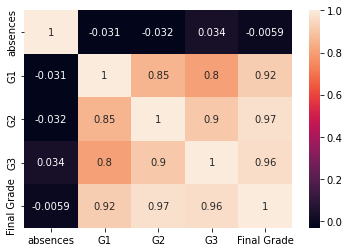

In [105]:
sns.heatmap(tabela[['absences', 'G1', 'G2', 'G3', 'Final Grade']].corr(), annot=True)

- Este mapa de calor definitivamente confirma nossas descobertas, os coeficientes de correlação para as métricas observadas e Ausências são muito próximos de zero.

# Conclusão Final: 
- O número de faltas de um aluno não resulta necessariamente em uma nota mais baixa em geral, pois os alunos ausentes normalmente compõem o material que perderam, efetivamente contabilizando sua ausência.

# Tamanho da família x Relacionamento familiar
- Famílias maiores necessariamente resultam em um relacionamento menos satisfatório? 
- Essa é a pergunta que esta mini-exploração procura responder.

[Text(0.5, 0, 'Tamanho da fámilia'),
 Text(0, 0.5, 'Relacionamento familiar'),
 Text(0.5, 1.0, 'Tamanho da família x Relacionamento familiar.')]

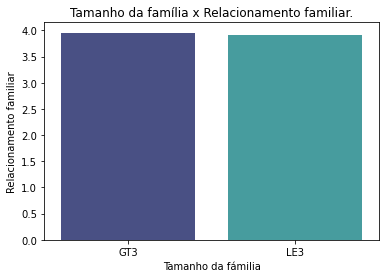

In [106]:
tamanho = tabela.groupby("famsize").aggregate({"famrel": "mean"})
tamanho.reset_index(inplace=True)

sns.barplot(x='famsize', y='famrel',palette='mako', data=tamanho).set(xlabel='Tamanho da fámilia', ylabel='Relacionamento familiar', title='Tamanho da família x Relacionamento familiar.')

In [107]:
tabela['famrel'].mean()

3.9443037974683546

- Para o contexto, cada relacionamento familiar é avaliado em 5, sendo um extremamente insatisfatório e 5 excepcional.
- O gráfico de barras indica que os diferentes tamanhos de família recebem aproximadamente a mesma classificação.
- Além disso, a classificação de relacionamento para cada família não se desvia muito da pontuação média de relacionamento familiar em toda database.

# Conclusão Final:
- Então, as famílias maiores têm um relacionamento mais tenso do que as famílias menores? Do gráfico de barras acima, podemos deduzir que a resposta é não.

# Idade x Nota

[Text(0.5, 0, 'Idade'), Text(0, 0.5, 'Quantidade'), Text(0.5, 1.0, 'Idade.')]

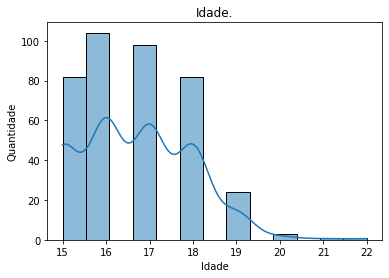

In [108]:
# Visualização da distribuição de idade
sns.histplot(x='age', data=tabela,kde=True).set(xlabel='Idade',ylabel='Quantidade', title='Idade.')

- Em vez de tratar a idade como um número, vou tratá-la como categoria, pois as visualizações melhorarão drasticamente em qualidade.

In [109]:
grau = tabela.groupby("age").aggregate({'Final Grade': 'mean', 'G1': 'mean', 'G2': 'mean', 'G3': 'mean'})
grau.reset_index(inplace=True)
grau

,age,Final Grade,G1,G2,G3
0,15,11.284553,11.231707,11.365854,11.256098
1,16,11.051282,10.942308,11.182692,11.028846
2,17,10.551020,10.897959,10.479592,10.275510
3,18,10.134146,10.719512,10.134146,9.548780
4,19,9.236111,10.250000,9.250000,8.208333
5,20,13.777778,13.666667,13.666667,14.000000
6,21,8.333333,10.000000,8.000000,7.000000
7,22,7.333333,6.000000,8.000000,8.000000


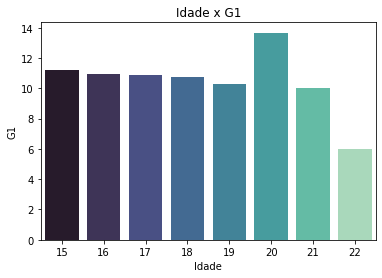

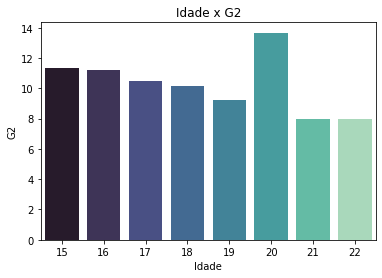

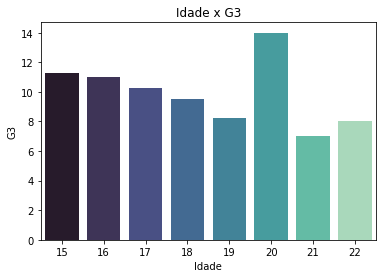

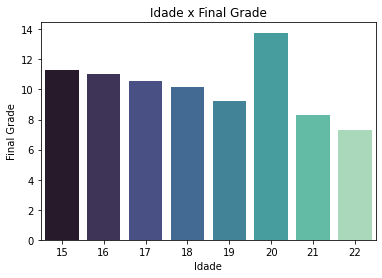

In [110]:
for metrica in padrao:
    sns.barplot(data=grau, x='age', y=metrica, palette='mako').set(xlabel='Idade', ylabel=metrica, title=f'Idade x {metrica}')
    plt.show()

# Conclusão Final:
- Quanto mais velha uma pessoa é, mais baixas são as notas que recebem, no entanto, jovens de vinte anos (neste database) apresentam um desempenho excepcional, eles lideram por pelo menos 2 pontos inteiros em uma escala de 19 pontos.

- No momento, não posso fazer nenhuma afirmação fundamentada sobre por que ocorre um aumento tão drástico. Não discutirei a razão por trás disso aqui.

# Nível de Educação x Cargo/trabalho
- Esta seção analisa os recursos que se desviam do tópico original. 
- No entanto, pensei que olhar para esses recursos poderia produzir resultados interessantes.

### Trabalho e educação das mães

In [111]:
mae = tabela.groupby("Mjob").aggregate({"Medu": "mean"})
mae.reset_index(inplace=True)
mae.sort_values(by='Medu', ascending=False, inplace=True)

[Text(0.5, 0, 'Cargo'),
 Text(0, 0.5, 'Nivel de Educação.'),
 Text(0.5, 1.0, 'Nível de Educação x Cargo/trabalho (Mãe)')]

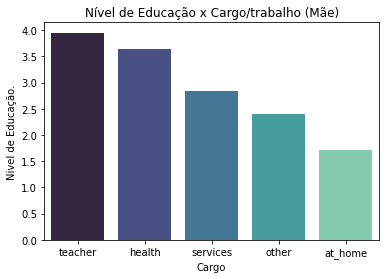

In [112]:
sns.barplot(x='Mjob', y='Medu', data=mae, palette='mako').set(xlabel='Cargo', ylabel='Nivel de Educação.', title='Nível de Educação x Cargo/trabalho (Mãe)')

- Como esperado, professores e profissionais de saúde precisam ter um alto nível de educação para conseguir um emprego na indústria.
- Por outro lado, as mães em casa não precisam de um alto nível de educação para realizar suas vidas diárias.

## Trabalho e educação dos pais

In [113]:
pai = tabela.groupby("Fjob").aggregate({"Fedu": "mean"})
pai.reset_index(inplace=True)
pai.sort_values(by='Fedu', ascending=False, inplace=True)

[Text(0.5, 0, 'Cargo'),
 Text(0, 0.5, 'Nivel de educação.'),
 Text(0.5, 1.0, 'Nível de Educação x Cargo/trabalho (Pai)')]

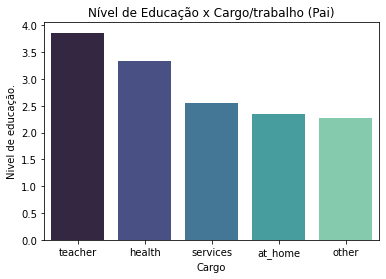

In [114]:
sns.barplot(x='Fjob', y='Fedu', data=pai, palette='mako').set(xlabel='Cargo', ylabel='Nivel de educação.', title='Nível de Educação x Cargo/trabalho (Pai)')

- O gráfico do pai produz aproximadamente os mesmos resultados que o gráfico da mãe.
- No entanto, há uma descoberta interessante: os pais em casa têm um nível de educação superior do que as mães em casa. 

# Conclusão Final:

- Esta analise rendeu resultados razoáveis. 
- Professores e profissionais de saúde tinham um nível de educação superior, enquanto os pais que moravam em casa tendem a estar na extremidade inferior do nível educacional.

# Produtividade vs Nota

[Text(0.5, 0, 'Produtividade de Tempo'),
 Text(0, 0.5, 'Nota Final.'),
 Text(0.5, 1.0, 'Produtividade de Tempo x Nota')]

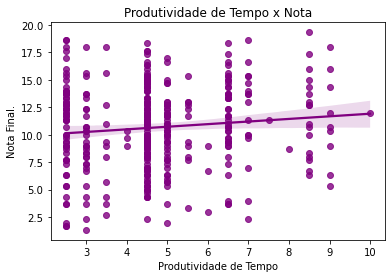

In [115]:
tabela['Time Productivity'] = 0.5 * tabela['traveltime'] + 2 * tabela['studytime']
sns.regplot(x='Time Productivity', y='Final Grade', data=tabela,color='Purple').set(xlabel='Produtividade de Tempo', ylabel='Nota Final.', title='Produtividade de Tempo x Nota')

- Como esperado, os alunos com maior produtividade de tempo têm melhores notas.

- Como a Produtividade abrange vários recursos, agora examinaremos a relação entre cada um desses recursos e a Nota Final.

[Text(0.5, 0, 'Tempo de Estudo'),
 Text(0, 0.5, 'Nota Final.'),
 Text(0.5, 1.0, 'Tempo de Estudo x Nota')]

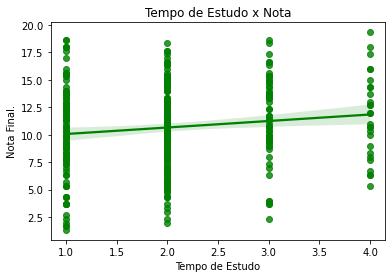

In [116]:
sns.regplot(x='studytime', y='Final Grade', data=tabela, color='Green').set(xlabel='Tempo de Estudo', ylabel='Nota Final.', title='Tempo de Estudo x Nota')

[Text(0.5, 0, 'Tempo de viagem'),
 Text(0, 0.5, 'Nota Final.'),
 Text(0.5, 1.0, 'Tempo de Viagem x Nota')]

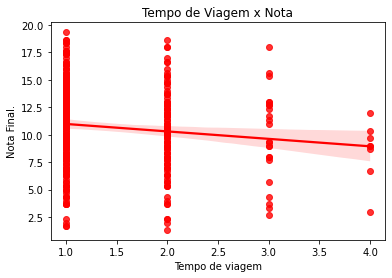

In [117]:
sns.regplot(x='traveltime', y='Final Grade', data=tabela, color='Red').set(xlabel='Tempo de viagem', ylabel='Nota Final.', title='Tempo de Viagem x Nota')

- Mais resultados esperados. Os alunos que estudam mais obtêm melhores resultados em provas e questionários. E
- Os alunos que viajam mais têm um desempenho pior em testes e questionários.

# Conclusão
- Esta análise confirmou o óbvio: os alunos que estudam mais recebem notas melhores, enquanto os alunos que viajam mais ou estudam menos recebem notas menores.

# Trabalho x Nota

### Trabalho da Mãe:

In [118]:
mae_t = tabela.groupby("Mjob").aggregate({"Final Grade": "mean"}).reset_index()
mae_t

,Mjob,Final Grade
0,at_home,9.762712
1,health,12.235294
2,other,10.059102
3,services,11.207120
4,teacher,11.270115


[Text(0.5, 0, 'Cargo'),
 Text(0, 0.5, 'Notal final'),
 Text(0.5, 1.0, 'Trabalho x Nota (Mãe)')]

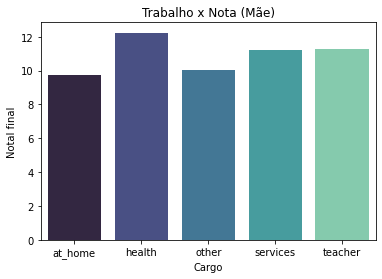

In [119]:
sns.barplot(data=mae_t, x='Mjob', y='Final Grade', palette='mako').set(xlabel='Cargo', ylabel='Notal final', title='Trabalho x Nota (Mãe)')


- Esta distribuição é bastante uniforme, embora haja algumas pequenas inconsistências. 
- Surpreendentemente, os alunos com mães que são profissionais de saúde recebem, em média, uma nota mais alta. Eu esperava que os alunos com mães que eram professoras tivessem as notas mais altas, pois a mãe seria competente o suficiente para ensinar o aluno de maneira eficaz.


### Trabalho do Pai:

In [120]:
pai_t = tabela.groupby("Fjob").aggregate({"Final Grade": "mean"}).reset_index()
pai_t

,Fjob,Final Grade
0,at_home,10.816667
1,health,11.481481
2,other,10.390169
3,services,10.669670
4,teacher,12.287356


[Text(0.5, 0, 'Cargo'),
 Text(0, 0.5, 'Nota Final'),
 Text(0.5, 1.0, 'Trabalho x Nota (Pai)')]

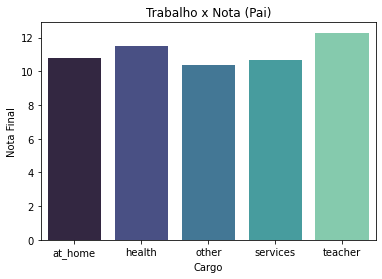

In [121]:
sns.barplot(data=pai_t, x='Fjob', y='Final Grade', palette='mako').set(xlabel='Cargo', ylabel='Nota Final', title='Trabalho x Nota (Pai)')


- Esses resultados são mais razoáveis do que o conjunto anterior. 
- Observe que a ordem desses resultados corresponde à ordem do nível de escolaridade do pai. Ou seja, pais com maior escolaridade tendem a aumentar mais o desempenho de seus filhos do que pais com menor escolaridade. O pai transmite diretamente seu conhecimento, cultivando assim o conhecimento do aluno.

# Conclusão Final:
###### Mãe:
- Essa analise revelou a relação um pouco surpreendente entre o trabalho da mãe e a nota do aluno.
- Descobrimos que mães que trabalham no setor de saúde têm filhos que recebem notas mais altas, em média, do que mães que trabalham em outras áreas.

###### Pai: 
- Para os pais, observamos um relacionamento que se poderia esperar. 
- Pais com níveis educacionais mais altos repassavam diretamente esse conhecimento para o aluno, eventualmente melhorando as notas gerais do aluno nos testes.

# Tamanho da Familía x Nota

In [122]:
tamanho = tabela.groupby("famsize").aggregate({"Final Grade": "mean", "G1": "mean", "G2": "mean", "G3": "mean"}).reset_index()
tamanho

,famsize,Final Grade,G1,G2,G3
0,GT3,10.485172,10.758007,10.519573,10.177936
1,LE3,11.157895,11.280702,11.192982,11.000000


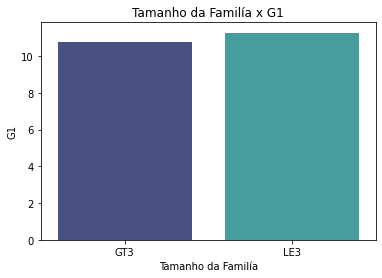

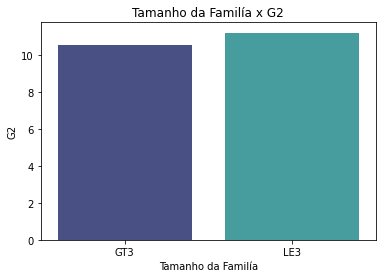

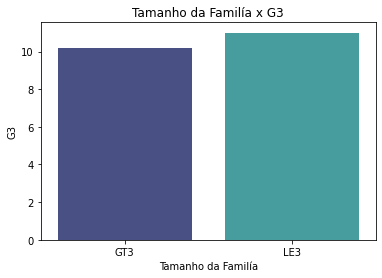

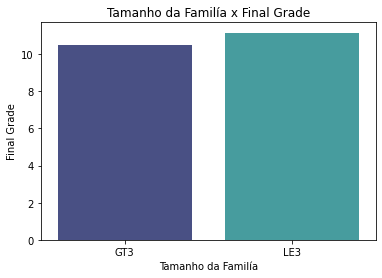

In [123]:
for metrica in padrao:
    sns.barplot(data=tamanho, x='famsize', y=metrica, palette='mako').set(xlabel='Tamanho da Familía', ylabel=metrica, title=f'Tamanho da Familía x {metrica}')
    plt.show()

# Conclusão Final:

- Como os gráficos de barras mostram, as crianças sem irmãos tendem a pontuar um mais alto do que os alunos com irmãos

# Atividades x Notas
- Esta analise explora a relação entre a quantidade de interação social que uma pessoa sofre e como essa pessoa pontua em um exame.

### Atividades: 

In [124]:
atividade = tabela.groupby("activities").aggregate({"Final Grade": "mean", "G1": "mean", "G2": "mean", "G3": "mean"}).reset_index()
atividade


,activities,Final Grade,G1,G2,G3
0,no,10.525773,10.716495,10.520619,10.340206
1,yes,10.827529,11.094527,10.900498,10.487562


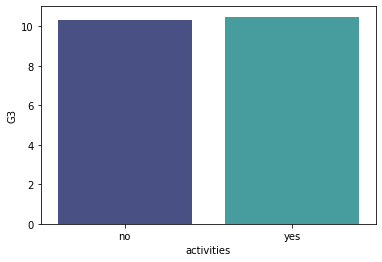

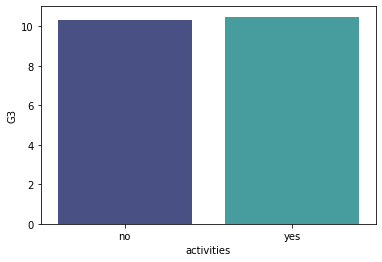

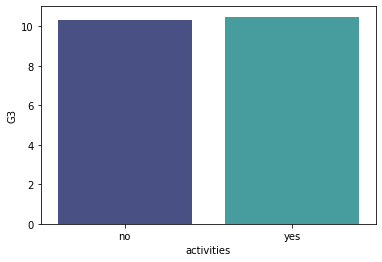

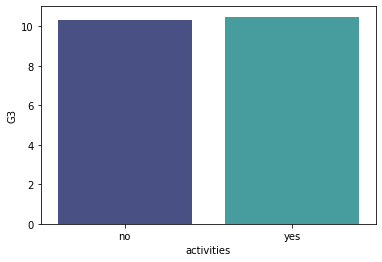

In [125]:
for metrica in padrao:
    sns.barplot(data=atividade, x='activities', y=metric, palette='mako')
    plt.show()

- Pessoas com atividades recebem notas mais altas em média.

### Sair:

In [126]:
sair = tabela.groupby("goout").aggregate({"Final Grade": "mean", "G1": "mean", "G2": "mean", "G3": "mean"}).reset_index()
sair

,goout,Final Grade,G1,G2,G3
0,1,10.594203,11.130435,10.782609,9.869565
1,2,11.339806,11.368932,11.456311,11.194175
2,3,11.097436,11.276923,11.053846,10.961538
3,4,10.046512,10.430233,10.058140,9.651163
4,5,9.433962,9.792453,9.471698,9.037736


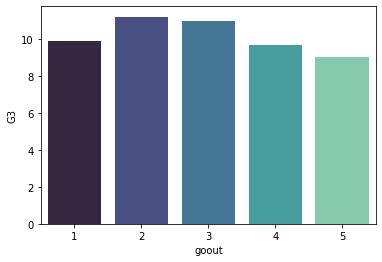

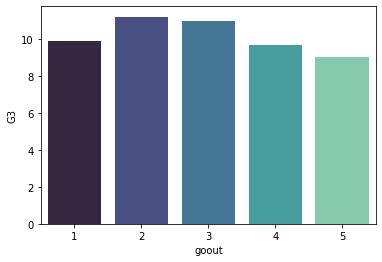

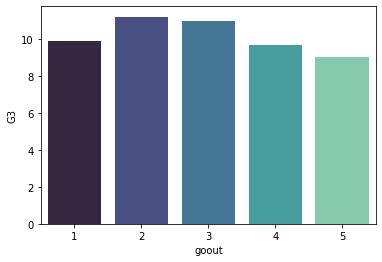

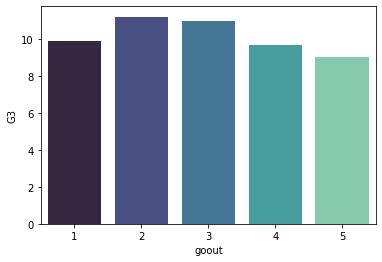

In [127]:
for metrica in padrao:
    sns.barplot(data=sair, x='goout', y=metric, palette='mako')
    plt.show()

- No geral, sair mais resulta em um aumento de curta duração seguido por uma queda acentuada nas pontuações dos testes.

# Conclusão Final: 
- Esta analise retratou uma relação surpreendente entre a frequência com que um aluno se envolve em atividades sociais. 
- Alunos com atividade social, em geral, pontuaram melhor do que alunos sem socialização.

- Pelo contrário, os alunos que saíam com mais frequência tendiam a pontuar no lado mais baixo do grafico de notas, a classificação perfeita em "goout" foi 2, pois resultou na pontuação média mais alta para todas as métricas de pontuação.

# Fim
#### Observe que esta analise não está totalmente completa. Examinei apenas uma parte das relações dentro dos dados. 
#### Obrigado por ler e deixe suas sugestões na seção de comentários.
#### Contato: https://www.linkedin.com/in/luan-alvarez-1499a7224/